<a href="https://colab.research.google.com/github/Pavithra3001/EIP4/blob/master/Week3/Assignment_new_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

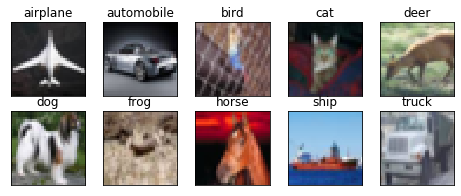

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [10]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 24s 61ms/step - loss: 1.8353 - acc: 0.3027 - val_loss: 1.4113 - val_acc: 0.4815
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3383 - acc: 0.5167 - val_loss: 1.1451 - val_acc: 0.5885
Epoch 3/50
390/390 [==============================] - 21s 55ms/step - loss: 1.1214 - acc: 0.6022 - val_loss: 1.0034 - val_acc: 0.6497
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9750 - acc: 0.6590 - val_loss: 0.8374 - val_acc: 0.7077
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8739 - acc: 0.7009 - val_loss: 0.7641 - val_acc: 0.7366
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8015 - acc: 0.7250 - val_loss: 0.7261 - val_acc: 0.7494
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7444 - acc: 0.7449 - val_loss: 0.7164 - val_acc: 0.7520
Epoch 8/50
390/390 [==============================] - 

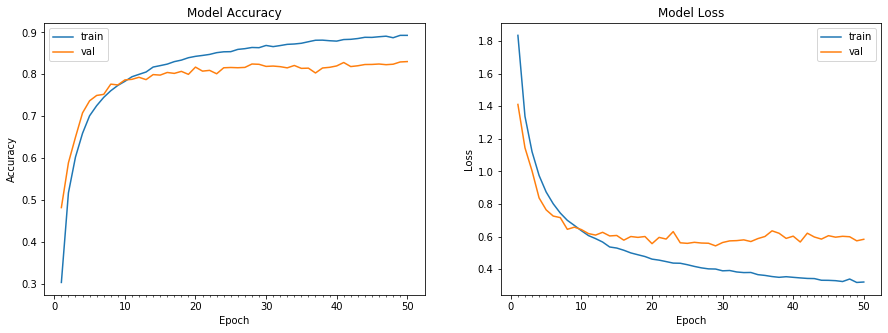

Accuracy on test data is: 83.03


In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**My Model**

In [13]:
from keras.layers.convolutional import DepthwiseConv2D, SeparableConv2D, Conv2D
from keras.layers import Activation, GlobalAveragePooling2D, AveragePooling2D

   

model_new = Sequential()

model_new.add(SeparableConv2D(64, 3, input_shape=(32, 32, 3),border_mode='same', use_bias=False, name = "Block1")) # RF 3X3
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
# 32x32x64 


model_new.add(SeparableConv2D(64, 3 ,activation='relu',border_mode='valid', use_bias=False)) # RF 5X5
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
# 28x28x64

model_new.add(SeparableConv2D(128, 3, activation='relu',border_mode='same', use_bias=False)) # RF 7X7
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
# 26x26x128

print("Block1-------------------------------------------------------------------------------------------")

model_new.add(SeparableConv2D(64, 3 ,activation='relu',border_mode='valid', use_bias=False)) # RF 9X9
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
# 24x24x64

model_new.add(SeparableConv2D(128, 3, activation='relu',border_mode='same', use_bias=False)) # RF 11X11
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
# 22x22x128

model_new.add(Conv2D(16, (1, 1), use_bias=False)) # RF
model_new.add(MaxPooling2D(pool_size=(2, 2))) 
model_new.add(Dropout(0.05))
# 11x11x16

print("Block2-------------------------------------------------------------------------------------------")

model_new.add(SeparableConv2D(128, 3 ,activation='relu',border_mode='valid', use_bias=False)) 
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
#9x9x128

model_new.add(SeparableConv2D(64, 3, activation='relu',border_mode='same', use_bias=False)) 
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
#7x7x64

model_new.add(SeparableConv2D(128, 3 ,activation='relu',border_mode='valid', use_bias=False)) 
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
#5x5x128


print("Block3-------------------------------------------------------------------------------------------")
model_new.add(SeparableConv2D(64, 3, activation='relu',border_mode='same', use_bias=False))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
# 3x3x64

model_new.add(SeparableConv2D(128, 3, activation='relu',border_mode='valid', use_bias=False)) # RF  
model_new.add(BatchNormalization())
model_new.add(Dropout(0.05))
# 1x1x128

model_new.add(SeparableConv2D(10, 1, 1, use_bias=False)) 
# 1x1x10

print("Block4------------------------------------------------------------------------------------------")


model_new.add(GlobalAveragePooling2D(data_format='channels_last')) # 10
model_new.add(Activation('softmax'))

scd_count = 0
for i, layer in enumerate(model_new.layers):
  if "separable_conv2d" in layer.name:
    layer.name = 'block_layer_' + str(scd_count)
    scd_count += 1
  
# Compile the model
#model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Completed-------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, 3, input_shape=(32, 32, 3..., use_bias=False, name="Block1", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, 3, activation="relu", use_bias=False, padding="valid")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, 3, activation="relu", use_bias=False, padding="same")`


Block1-------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, 3, activation="relu", use_bias=False, padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, 3, activation="relu", use_bias=False, padding="same")`


Block2-------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, 3, activation="relu", use_bias=False, padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, 3, activation="relu", use_bias=False, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, 3, activation="relu", use_bias=False, padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, 3, activation="relu", use_bias=False, padding="same")`


Block3-------------------------------------------------------------------------------------------
Block4------------------------------------------------------------------------------------------
Completed-------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, 3, activation="relu", use_bias=False, padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(10, (1, 1), use_bias=False)`


In [14]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Block1 (SeparableConv2D)     (None, 32, 32, 64)        219       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
block_layer_0 (SeparableConv (None, 30, 30, 64)        4672      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., shuffle=True, steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 82s 211ms/step - loss: 1.3360 - acc: 0.5109 - val_loss: 4.9353 - val_acc: 0.2891
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 78s 200ms/step - loss: 0.9027 - acc: 0.6782 - val_loss: 1.1121 - val_acc: 0.6375
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 77s 197ms/step - loss: 0.7510 - acc: 0.7347 - val_loss: 0.7956 - val_acc: 0.7313
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 78s 200ms/step - loss: 0.6634 - acc: 0.7682 - val_loss: 0.7492 - val_acc: 0.7412
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 78s 201ms/step - loss: 0.6037 - acc: 0

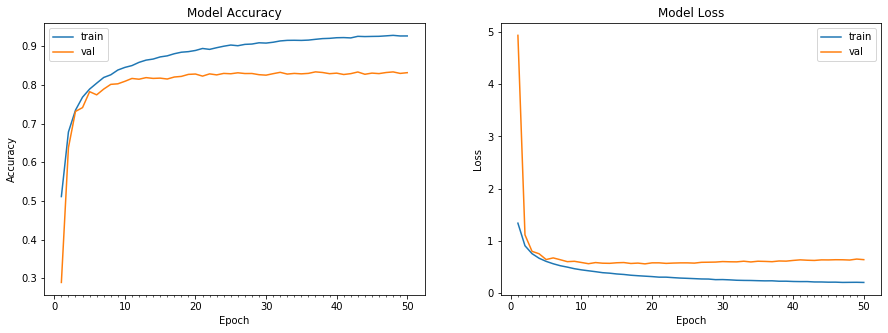

Accuracy on test data is: 83.15


In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model_new.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model_new.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], shuffle=True)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_new))